In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [3]:
df = pd.read_csv('/content/drive/MyDrive/bitcoin/bitcoin.csv')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()


In [5]:
df.isnull()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,False,False,False,False,False,False
2017-01-02,False,False,False,False,False,False
2017-01-03,False,False,False,False,False,False
2017-01-04,False,False,False,False,False,False
2017-01-05,False,False,False,False,False,False
...,...,...,...,...,...,...
2019-11-11,False,False,False,False,False,False
2019-11-12,False,False,False,False,False,False
2019-11-13,False,False,False,False,False,False


In [6]:
df.isnull().sum()
df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-2354036562.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
data = df[['Close']]


In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)


In [9]:
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, 60)


In [10]:
X = X.reshape(X.shape[0], X.shape[1], 1)


In [11]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [12]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 0.0389 - val_loss: 0.0047
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0044 - val_loss: 0.0027
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0

In [14]:
predictions = model.predict(X_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


In [15]:
predictions = scaler.inverse_transform(predictions.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))


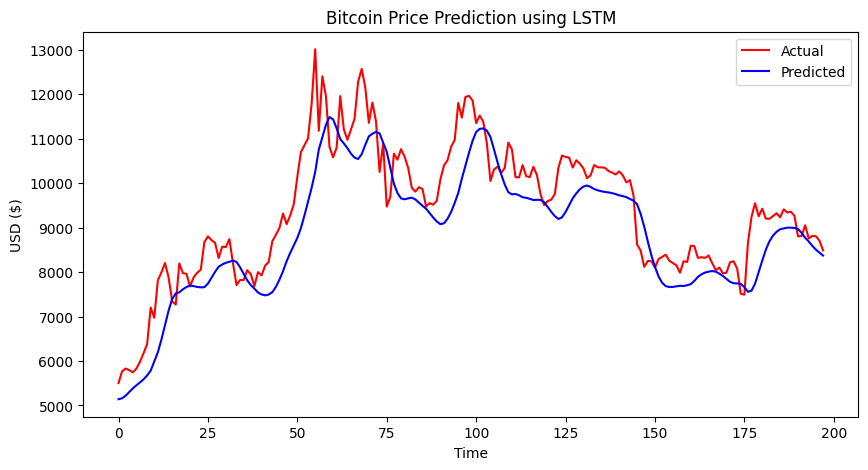

In [16]:
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, color='red')
plt.plot(predictions, color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Bitcoin Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('USD ($)')
plt.show()


In [17]:
last_60_days = scaled_data[-60:]
last_60_days = last_60_days.reshape(1, 60, 1)

next_day_price = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_price)

print("Predicted Next Day Price:", next_day_price[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Next Day Price: 8296.4375
